In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [2]:
diabetes_dataset=pd.read_csv('../datasets/diabetes.csv')

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
x=diabetes_dataset.drop(columns='Outcome',axis=1)
y=diabetes_dataset['Outcome']


In [10]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [12]:
X_train.shape

(614, 8)

In [13]:
X_test.shape

(154, 8)

In [14]:

model1=svm.SVC(kernel='linear')

In [15]:
model1.fit(X_train,Y_train)

SVC(kernel='linear')

In [16]:
Y_pred=model1.predict(X_test)

In [17]:
print('Accuracy of the model:',accuracy_score(Y_test,Y_pred))

Accuracy of the model: 0.7207792207792207


In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [20]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

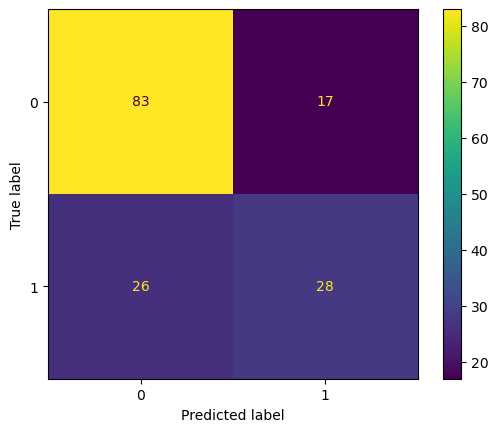

In [21]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [23]:
from sklearn.metrics import precision_score

# Calculate precision
precision = precision_score(Y_test, Y_pred)

print("Precision:", precision)


Precision: 0.6222222222222222


In [24]:
#calculate recall
from sklearn.metrics import recall_score

recall=recall_score(Y_test,Y_pred)

print("Recall:",recall)



Recall: 0.5185185185185185


In [ ]:
# 

In [25]:
# model 2 using regression
from sklearn.linear_model import LogisticRegression


In [26]:
model2=LogisticRegression(max_iter=200)

In [27]:
model2.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [28]:
Y_pred=model2.predict(X_test)

In [29]:
# Accurecy score

print('Accuracy of the model:',accuracy_score(Y_test,Y_pred))

Accuracy of the model: 0.7142857142857143


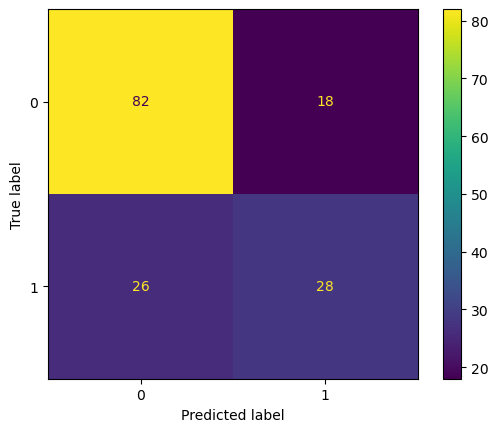

In [31]:
# Compute confusion matrix

cm = confusion_matrix(Y_test, Y_pred)

display=ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

In [32]:
# Calculate precision

precision=precision_score(Y_test,Y_pred)

print("Precision:",precision)

Precision: 0.6086956521739131


In [33]:
# Calculate recall

recall=recall_score(Y_test,Y_pred)

print("Recall:",recall)


Recall: 0.5185185185185185


In [34]:
# Model3 using Descision Tree

from sklearn.tree import DecisionTreeClassifier

In [35]:
model3=DecisionTreeClassifier(max_depth=5, random_state=42)

In [36]:
model3.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [37]:
# Predict the model

Y_pred=model3.predict(X_test)

In [38]:
print('Accuracy of the model:',accuracy_score(Y_test,Y_pred))

Accuracy of the model: 0.7922077922077922


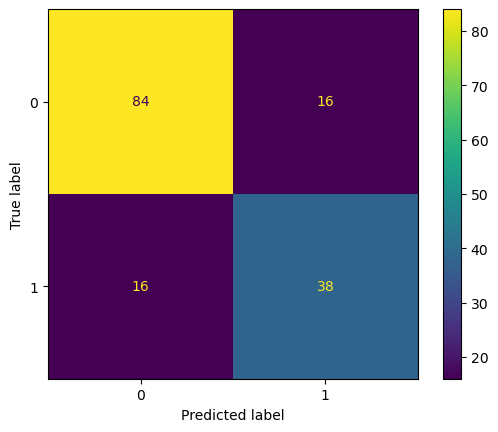

In [39]:
# Compute confusion matrix

cm = confusion_matrix(Y_test, Y_pred)

display=ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

In [40]:
# Calculate precision

precision=precision_score(Y_test,Y_pred)

print("Precision:",precision)


Precision: 0.7037037037037037


In [42]:
# Calculate recall
recall=recall_score(Y_test,Y_pred)

print("Recall:",recall)

Recall: 0.7037037037037037


In [43]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [45]:
import pickle
filename='diabetes-prediction-model.sav'
pickle.dump(model3,open(filename,'wb'))